In [1]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmajumder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
dfs = pd.read_excel('../data/QBO_IOS_With_Auto_Aspect_1583620920292.xlsx', sheet_name='Review Text')

In [12]:
dfs.head()

,Unnamed: 0,Review ID,Version,Rating,Date,Aspect,Subject,Body
0,0,5.467988e+09,20.01.6,1,2020-01-31,"Receipt match,quality,invoicing,payment,report,navigation,help,customers service,data",Shiny useless tool,This app looks awesome. Very well thought out design and it appears that most of the functions are right at my fingertips. Not so. I have used it mostly for categorizing expenses. I was trying...
1,1,5.464235e+09,20.01.5,1,2020-01-30,"quality,updates",Latest app update,This update is terrible basically unusable please change it back ASAP
2,2,5.467098e+09,20.01.5,3,2020-01-30,"help,data,customers service,experience,quality,transaction",App closes out while entering expenses,The majority of the time this app is wonderful. On a regular basis it will completely close out and I will lose the transaction I’m in the middle of. \nI’ve continually notified Intuit about this ...
3,3,5.466985e+09,20.01.5,5,2020-01-30,"general,quality",Life saver,One my favorite apps to use while working. I’m on it like a social media page. Thanks quick books.
4,4,5.467691e+09,20.01.6,5,2020-01-30,"general,quality",Small business,This absolutely works perfectly without difficulty.


In [13]:
len(dfs)

7552

In [14]:
dfs.columns

Index(['Unnamed: 0', 'Review ID', 'Version', 'Rating', 'Date', 'Aspect',
       'Subject', 'Body'],
      dtype='object')

In [15]:
dfs.head()

,Unnamed: 0,Review ID,Version,Rating,Date,Aspect,Subject,Body
0,0,5.467988e+09,20.01.6,1,2020-01-31,"Receipt match,quality,invoicing,payment,report,navigation,help,customers service,data",Shiny useless tool,This app looks awesome. Very well thought out design and it appears that most of the functions are right at my fingertips. Not so. I have used it mostly for categorizing expenses. I was trying...
1,1,5.464235e+09,20.01.5,1,2020-01-30,"quality,updates",Latest app update,This update is terrible basically unusable please change it back ASAP
2,2,5.467098e+09,20.01.5,3,2020-01-30,"help,data,customers service,experience,quality,transaction",App closes out while entering expenses,The majority of the time this app is wonderful. On a regular basis it will completely close out and I will lose the transaction I’m in the middle of. \nI’ve continually notified Intuit about this ...
3,3,5.466985e+09,20.01.5,5,2020-01-30,"general,quality",Life saver,One my favorite apps to use while working. I’m on it like a social media page. Thanks quick books.
4,4,5.467691e+09,20.01.6,5,2020-01-30,"general,quality",Small business,This absolutely works perfectly without difficulty.


In [16]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

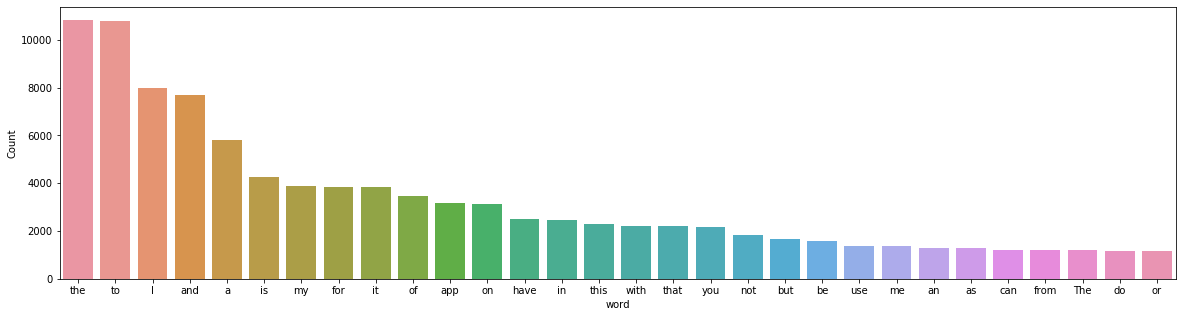

In [17]:
freq_words(dfs['Body'])

In [18]:
# remove unwanted characters, numbers and symbols
df['Body'] = df['Body'].str.replace("[^a-zA-Z#]", " ")

In [19]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [20]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['Body'] = df['Body'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['Body']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

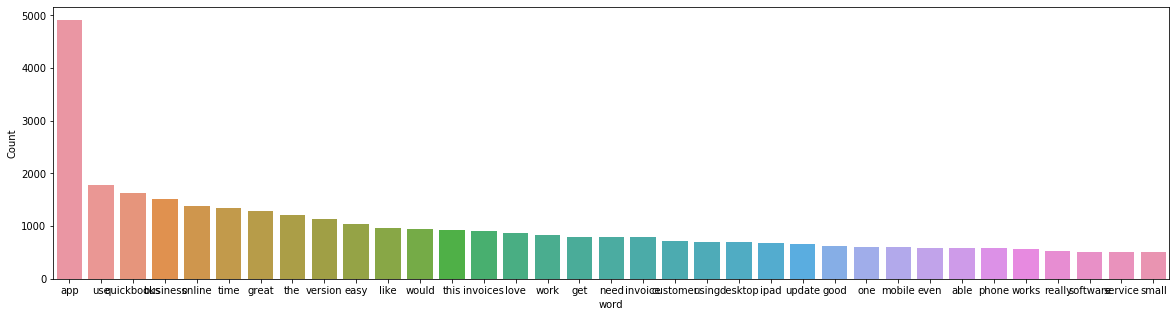

In [21]:
freq_words(reviews, 35)

In [22]:
!python -m spacy download en # one time run

You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/rmajumder/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/home/rmajumder/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [23]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [24]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['this', 'update', 'terrible', 'basically', 'unusable', 'please', 'change', 'back', 'asap']


In [25]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['update', 'terrible', 'unusable']


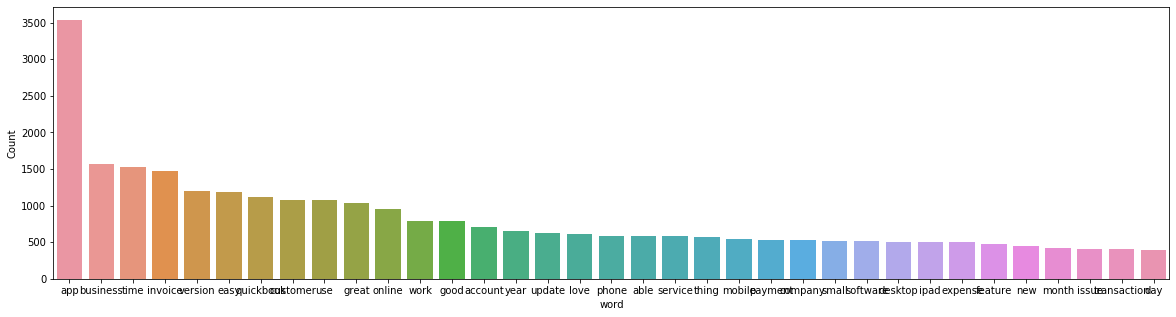

In [26]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

In [27]:
dictionary = corpora.Dictionary(reviews_2)

In [28]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [29]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [30]:
lda_model.print_topics()

[(0,
  '0.076*"business" + 0.033*"app" + 0.029*"small" + 0.028*"quickbook" + 0.028*"user" + 0.022*"software" + 0.019*"great" + 0.018*"good" + 0.016*"year" + 0.014*"friendly"'),
 (1,
  '0.062*"app" + 0.062*"time" + 0.045*"update" + 0.035*"invoice" + 0.030*"customer" + 0.026*"work" + 0.019*"email" + 0.016*"new" + 0.015*"use" + 0.013*"last"'),
 (2,
  '0.078*"account" + 0.045*"bank" + 0.042*"payment" + 0.039*"transaction" + 0.030*"card" + 0.028*"password" + 0.028*"credit" + 0.024*"day" + 0.014*"deposit" + 0.014*"month"'),
 (3,
  '0.084*"version" + 0.052*"online" + 0.033*"desktop" + 0.029*"good" + 0.026*"app" + 0.024*"quickbook" + 0.020*"year" + 0.016*"ipad" + 0.013*"feature" + 0.012*"product"'),
 (4,
  '0.081*"app" + 0.048*"invoice" + 0.033*"expense" + 0.029*"mobile" + 0.028*"able" + 0.018*"receipt" + 0.017*"report" + 0.017*"ipad" + 0.017*"feature" + 0.016*"access"'),
 (5,
  '0.088*"easy" + 0.062*"use" + 0.052*"business" + 0.048*"great" + 0.047*"love" + 0.038*"app" + 0.027*"book" + 0.027*"

In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/rmajumder/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.020080 -0.194330       1        1  16.861313
3     -0.093440  0.080887       2        1  16.758780
1     -0.003367 -0.211726       3        1  15.573788
5     -0.161165 -0.005993       4        1  15.082617
6      0.070691  0.002562       5        1  14.890398
0     -0.139792  0.230578       6        1  12.617390
2      0.347153  0.098023       7        1   8.215715, topic_info=    Category         Freq       Term        Total  loglift  logprob
171  Default  1149.000000    version  1149.000000  30.0000  30.0000
85   Default  1082.000000       easy  1082.000000  29.0000  29.0000
84   Default  1476.000000   business  1476.000000  28.0000  28.0000
150  Default   675.000000    account   675.000000  27.0000  27.0000
94   Default  1008.000000        use  1008.000000  26.0000  26.0000
..       ...          ...        ...          ...      ...      ...
210   Topic7    69.900391     client   372.420105   0.8262  -4.5674
78    Topic7    86.752960  quickbook  1034.962036   0.0201  -4.3515
17    Topic7    49.075176        new   419.171509   0.3542  -4.9212
105   Topic7    42.963600       able   579.866028  -0.1033  -5.0542
258   Topic7    34.434765      phone   508.635712  -0.1935  -5.2755

[442 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
451       1  0.879903  ability
451       4  0.119552  ability
105       1  0.657048     able
105       4  0.163831     able
105       5  0.105197     able
...     ...       ...      ...
1171      6  0.959212    world
104       2  0.467982     year
104       3  0.054063     year
104       5  0.197668     year
104       6  0.280452     year

[585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 6, 7, 1, 3])